<a href="https://colab.research.google.com/github/cowsilver57/sessac_test/blob/main/11%EC%9B%94_27%EC%9D%BC_(%EC%9B%94)_Day_58.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Convolutional Neural Networks

# MNIST dataset LeNet5 Model로 학습시키기

LeNet5 Modeling

In [2]:
import torch
import torch.nn as nn

H, W = 28,28
input_tensor = torch.randn(size=(8,1,H,W))

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2)
        self.act1 = nn.Tanh()

        self.avg_p1 = nn.AvgPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1)
        self.act2 = nn.Tanh()

        self.avg_p2 = nn.AvgPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1)
        self.act3 = nn.Tanh()

        self.fc1 = nn.Linear(in_features=120, out_features=84)
        self.act4 = nn.Tanh()

        self.fc2 = nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.act1(x)

        x = self.avg_p1(x)

        x = self.conv2(x)
        x = self.act2(x)

        x = self.avg_p2(x)

        x = self.conv3(x)
        x = self.act3(x)

        x = x.view(x.size(0), -1)

        x = self.fc1(x)
        x = self.act4(x)

        x = self.fc2(x)
        return x

model = LeNet5()
result = model(input_tensor)
print(result)

tensor([[-0.0585,  0.0508, -0.1947, -0.0275,  0.0361, -0.0692, -0.1525, -0.0230,
          0.0801,  0.0736],
        [-0.0219,  0.0414, -0.1641, -0.0279,  0.0136, -0.0493, -0.1388, -0.0498,
          0.0871,  0.0905],
        [-0.0270,  0.0332, -0.1765, -0.0239,  0.0208, -0.0447, -0.1268, -0.0215,
          0.0671,  0.0876],
        [-0.0291,  0.0384, -0.1673, -0.0250,  0.0335, -0.0595, -0.1329, -0.0480,
          0.0905,  0.1014],
        [-0.0246,  0.0379, -0.1652, -0.0173,  0.0194, -0.0591, -0.1460, -0.0435,
          0.0607,  0.0939],
        [-0.0232,  0.0374, -0.1688, -0.0380,  0.0133, -0.0443, -0.1333, -0.0179,
          0.0936,  0.0903],
        [-0.0239,  0.0447, -0.1702, -0.0257,  0.0204, -0.0495, -0.1376, -0.0482,
          0.0928,  0.0856],
        [-0.0192,  0.0420, -0.1777, -0.0510,  0.0277, -0.0476, -0.1431, -0.0516,
          0.0559,  0.0906]], grad_fn=<AddmmBackward0>)


학습시키기

In [8]:
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch
from torch.optim import SGD

BATCH_SIZE = 32
LR = 0.003
EPOCHS = 10

dataset = MNIST(root='data', train=True, download=True, transform=ToTensor())
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE)
n_samples = len(dataset)

if torch.cuda.is_available(): DEVICE = 'cuda'
elif torch.backends.mps.is_available(): DEVICE = 'mps'
else: DEVICE = 'cpu'

model = LeNet5().to(DEVICE)
loss_function = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=LR)

from tqdm import tqdm
losses, accs = [],[]
for epoch in range(EPOCHS):
    epoch_loss, n_corrects = 0.,0
    for X_, y_ in tqdm(dataloader):
        X_, y_ = X_.to(DEVICE), y_.to(DEVICE)

        pred = model(X_)
        loss = loss_function(pred, y_)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()*len(X_)
        n_corrects += (torch.max(pred, axis=1)[1]==y_).sum().item()

    epoch_loss /= n_samples
    losses.append(epoch_loss)

    epoch_acc = n_corrects/n_samples
    accs.append(epoch_acc)

    print(f"Epoch: {epoch+1}")
    print(f"Loss: {epoch_loss:.4f} - Acc: {epoch_acc:.4f}")

100%|██████████| 1875/1875 [00:11<00:00, 167.77it/s]


Epoch: 1
Loss: 2.2566 - Acc: 0.3289


100%|██████████| 1875/1875 [00:11<00:00, 167.27it/s]


Epoch: 2
Loss: 1.3333 - Acc: 0.6780


100%|██████████| 1875/1875 [00:11<00:00, 165.83it/s]


Epoch: 3
Loss: 0.6353 - Acc: 0.8291


100%|██████████| 1875/1875 [00:11<00:00, 156.40it/s]


Epoch: 4
Loss: 0.4562 - Acc: 0.8752


100%|██████████| 1875/1875 [00:11<00:00, 164.54it/s]


Epoch: 5
Loss: 0.3798 - Acc: 0.8928


100%|██████████| 1875/1875 [00:11<00:00, 165.90it/s]


Epoch: 6
Loss: 0.3330 - Acc: 0.9040


100%|██████████| 1875/1875 [00:10<00:00, 176.16it/s]


Epoch: 7
Loss: 0.2983 - Acc: 0.9134


100%|██████████| 1875/1875 [00:10<00:00, 171.45it/s]


Epoch: 8
Loss: 0.2704 - Acc: 0.9214


100%|██████████| 1875/1875 [00:11<00:00, 165.86it/s]


Epoch: 9
Loss: 0.2472 - Acc: 0.9275


100%|██████████| 1875/1875 [00:11<00:00, 164.46it/s]

Epoch: 10
Loss: 0.2274 - Acc: 0.9332


시각화하기

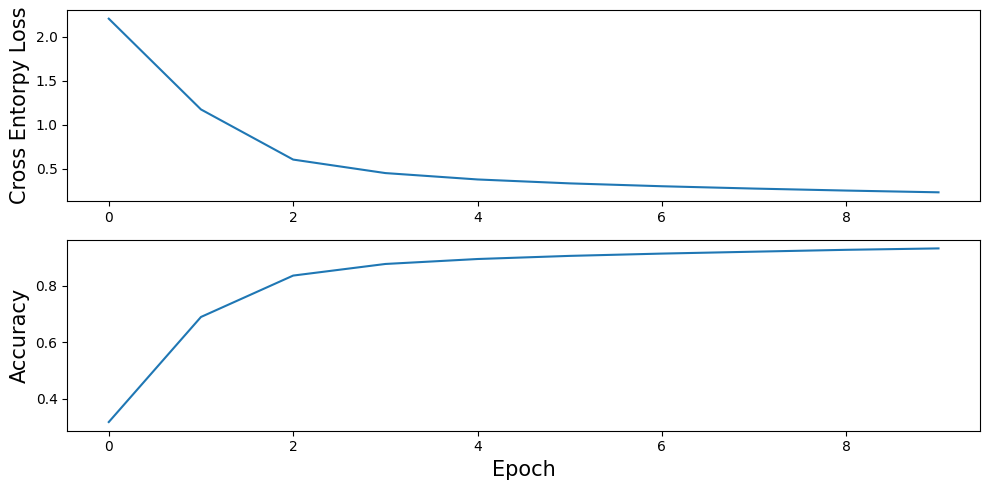

In [4]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10, 5))
axes[0].plot(losses)
axes[1].plot(accs)
axes[1].set_xlabel("Epoch", fontsize=15)
axes[0].set_ylabel("Cross Entorpy Loss", fontsize=15)
axes[1].set_ylabel("Accuracy", fontsize=15)
axes[0].tick_params(labelsize=10)
axes[1].tick_params(labelsize=10)
fig.tight_layout()
plt.show()

# Fashion MNIST dataset LeNet5 Model로 학습시키기

In [11]:
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch
from torch.optim import SGD

BATCH_SIZE = 32
LR = 0.1
EPOCHS = 10

dataset = FashionMNIST(root='data', train=True, download=True, transform=ToTensor())
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE)
n_samples = len(dataset)

if torch.cuda.is_available(): DEVICE = 'cuda'
elif torch.backends.mps.is_available(): DEVICE = 'mps'
else: DEVICE = 'cpu'

model = LeNet5().to(DEVICE)
loss_function = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=LR)

from tqdm import tqdm
losses, accs = [],[]
for epoch in range(EPOCHS):
    epoch_loss, n_corrects = 0.,0
    for X_, y_ in tqdm(dataloader):
        X_, y_ = X_.to(DEVICE), y_.to(DEVICE)

        pred = model(X_)
        loss = loss_function(pred, y_)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()*len(X_)
        n_corrects += (torch.max(pred, axis=1)[1]==y_).sum().item()

    epoch_loss /= n_samples
    losses.append(epoch_loss)

    epoch_acc = n_corrects/n_samples
    accs.append(epoch_acc)

    print(f"Epoch: {epoch+1}")
    print(f"Loss: {epoch_loss:.4f} - Acc: {epoch_acc:.4f}")

100%|██████████| 1875/1875 [00:11<00:00, 163.22it/s]


Epoch: 1
Loss: 0.6141 - Acc: 0.7683


100%|██████████| 1875/1875 [00:11<00:00, 168.41it/s]


Epoch: 2
Loss: 0.3966 - Acc: 0.8543


100%|██████████| 1875/1875 [00:11<00:00, 163.79it/s]


Epoch: 3
Loss: 0.3474 - Acc: 0.8720


100%|██████████| 1875/1875 [00:11<00:00, 163.39it/s]


Epoch: 4
Loss: 0.3176 - Acc: 0.8826


100%|██████████| 1875/1875 [00:11<00:00, 162.04it/s]


Epoch: 5
Loss: 0.2958 - Acc: 0.8902


100%|██████████| 1875/1875 [00:11<00:00, 161.62it/s]


Epoch: 6
Loss: 0.2784 - Acc: 0.8968


100%|██████████| 1875/1875 [00:11<00:00, 160.06it/s]


Epoch: 7
Loss: 0.2638 - Acc: 0.9023


100%|██████████| 1875/1875 [00:11<00:00, 165.65it/s]


Epoch: 8
Loss: 0.2508 - Acc: 0.9071


100%|██████████| 1875/1875 [00:10<00:00, 172.57it/s]


Epoch: 9
Loss: 0.2390 - Acc: 0.9112


100%|██████████| 1875/1875 [00:11<00:00, 159.17it/s]

Epoch: 10
Loss: 0.2281 - Acc: 0.9154


시각화하기

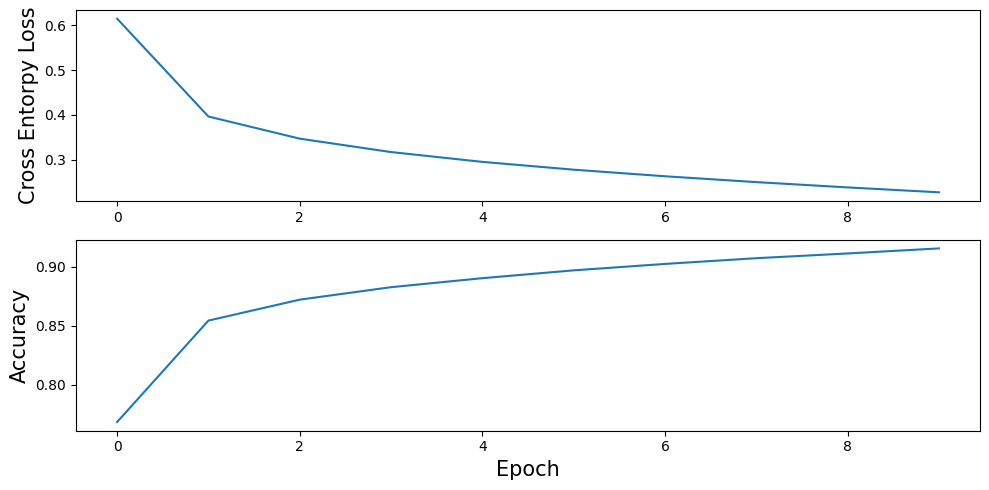

In [12]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10, 5))
axes[0].plot(losses)
axes[1].plot(accs)
axes[1].set_xlabel("Epoch", fontsize=15)
axes[0].set_ylabel("Cross Entorpy Loss", fontsize=15)
axes[1].set_ylabel("Accuracy", fontsize=15)
axes[0].tick_params(labelsize=10)
axes[1].tick_params(labelsize=10)
fig.tight_layout()
plt.show()

# MNIST 학습한 코드를 nn.Sequential로 정리하기

In [4]:
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torch.optim import SGD
from tqdm import tqdm

BATCH_SIZE = 32
LR = 0.003
EPOCHS = 10

dataset = MNIST(root='data', train=True, download=True, transform=ToTensor())
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE)
n_samples = len(dataset)

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1),
            nn.Tanh())

        self.fc = nn.Sequential(
            nn.Linear(in_features=120, out_features=84),
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=10))

    def forward(self, x):
        x = self.model(x)
        x = x.view(x.size(0),-1)
        x = self.fc(x)

        return x

model = LeNet5().to(DEVICE)
loss_function = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=LR)

losses, accs = [], []
for epoch in range(EPOCHS):
    epoch_loss, n_corrects = 0., 0
    for X_, y_ in tqdm(dataloader):
        X_, y_ = X_.to(DEVICE), y_.to(DEVICE)

        pred = model(X_)
        loss = loss_function(pred, y_)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * len(X_)
        n_corrects += (torch.max(pred, axis=1)[1] == y_).sum().item()

    epoch_loss /= n_samples
    losses.append(epoch_loss)

    epoch_acc = n_corrects / n_samples
    accs.append(epoch_acc)

    print(f"Epoch: {epoch+1}")
    print(f"Loss: {epoch_loss:.4f} - Acc: {epoch_acc:.4f}")

100%|██████████| 1875/1875 [00:10<00:00, 178.04it/s]


Epoch: 1
Loss: 2.2575 - Acc: 0.2484


100%|██████████| 1875/1875 [00:11<00:00, 168.81it/s]


Epoch: 2
Loss: 1.3796 - Acc: 0.6711


100%|██████████| 1875/1875 [00:12<00:00, 150.70it/s]


Epoch: 3
Loss: 0.6239 - Acc: 0.8362


100%|██████████| 1875/1875 [00:11<00:00, 169.23it/s]


Epoch: 4
Loss: 0.4503 - Acc: 0.8757


100%|██████████| 1875/1875 [00:11<00:00, 161.71it/s]


Epoch: 5
Loss: 0.3780 - Acc: 0.8930


100%|██████████| 1875/1875 [00:10<00:00, 180.24it/s]


Epoch: 6
Loss: 0.3354 - Acc: 0.9034


100%|██████████| 1875/1875 [00:10<00:00, 171.99it/s]


Epoch: 7
Loss: 0.3038 - Acc: 0.9119


100%|██████████| 1875/1875 [00:11<00:00, 167.19it/s]


Epoch: 8
Loss: 0.2774 - Acc: 0.9188


100%|██████████| 1875/1875 [00:11<00:00, 167.71it/s]


Epoch: 9
Loss: 0.2542 - Acc: 0.9254


100%|██████████| 1875/1875 [00:11<00:00, 169.53it/s]

Epoch: 10
Loss: 0.2336 - Acc: 0.9314


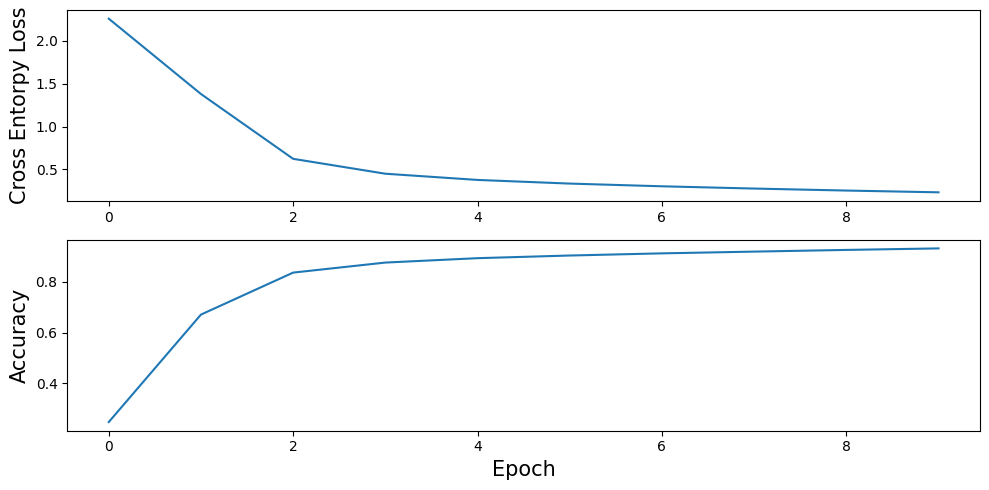

In [5]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10, 5))
axes[0].plot(losses)
axes[1].plot(accs)
axes[1].set_xlabel("Epoch", fontsize=15)
axes[0].set_ylabel("Cross Entorpy Loss", fontsize=15)
axes[1].set_ylabel("Accuracy", fontsize=15)
axes[0].tick_params(labelsize=10)
axes[1].tick_params(labelsize=10)
fig.tight_layout()
plt.show()

#VGG Modeling

VGG 11 구현하기

In [37]:
import torch
import torch.nn as nn

H, W = 224,224
input_tensor = torch.randn(size=(8,3,H,W))

class VGG11(nn.Module):
    def __init__(self):
        super(VGG11, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1, stride=1)
        self.act1 = nn.ReLU()
        self.max_p1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1, stride=1)
        self.act2 = nn.ReLU()
        self.max_p2  = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1, stride=1)
        self.act3 = nn.ReLU()
        self.conv4 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1, stride=1)
        self.act4 = nn.ReLU()
        self.max_p3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv5 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1, stride=1)
        self.act5 = nn.ReLU()
        self.conv6 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1, stride=1)
        self.act6 = nn.ReLU()
        self.max_p4 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv7 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1, stride=1)
        self.act7 = nn.ReLU()
        self.conv8 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1, stride=1)
        self.act8 = nn.ReLU()
        self.max_p5 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(in_features=25088, out_features=4096)
        self.act9 = nn.ReLU()

        self.fc2 = nn.Linear(in_features=4096, out_features=4096)
        self.act10 = nn.ReLU()

        self.fc3 = nn.Linear(in_features=4096, out_features=1000)
        self.act11 = nn.ReLU()

    def forward(self,x):
        x = self.conv1(x)
        x = self.act1(x)
        x = self.max_p1(x)
        print(x.shape)
        x = self.conv2(x)
        x = self.act2(x)
        x = self.max_p2(x)
        print(x.shape)
        x = self.conv3(x)
        x = self.act3(x)
        x = self.conv4(x)
        x = self.act4(x)
        x = self.max_p3(x)
        print(x.shape)
        x = self.conv5(x)
        x = self.act5(x)
        x = self.conv6(x)
        x = self.act6(x)
        x = self.max_p4(x)
        print(x.shape)
        x = self.conv7(x)
        x = self.act7(x)
        x = self.conv8(x)
        x = self.act8(x)
        x = self.max_p5(x)
        print(x.shape)
        x = x.view(x.size(0),-1)
        print(x.shape)
        x = self.fc1(x)
        x = self.act9(x)
        print(x.shape)
        x = self.fc2(x)
        x = self.act10(x)
        print(x.shape)
        x = self.fc3(x)
        x = self.act11(x)
        print(x.shape)
        return x
model = VGG11()
result = model(input_tensor)
print(result)

torch.Size([8, 64, 112, 112])
torch.Size([8, 128, 56, 56])
torch.Size([8, 256, 28, 28])
torch.Size([8, 512, 14, 14])
torch.Size([8, 512, 7, 7])
torch.Size([8, 25088])
torch.Size([8, 4096])
torch.Size([8, 4096])
torch.Size([8, 1000])
tensor([[0.0000e+00, 2.1323e-03, 1.2011e-02,  ..., 0.0000e+00, 0.0000e+00,
         1.1912e-04],
        [0.0000e+00, 2.1660e-03, 1.2020e-02,  ..., 0.0000e+00, 0.0000e+00,
         9.6958e-05],
        [0.0000e+00, 2.1408e-03, 1.2011e-02,  ..., 0.0000e+00, 0.0000e+00,
         1.2336e-04],
        ...,
        [0.0000e+00, 2.1557e-03, 1.2014e-02,  ..., 0.0000e+00, 0.0000e+00,
         1.1837e-04],
        [0.0000e+00, 2.1501e-03, 1.2030e-02,  ..., 0.0000e+00, 0.0000e+00,
         1.0110e-04],
        [0.0000e+00, 2.1492e-03, 1.1997e-02,  ..., 0.0000e+00, 0.0000e+00,
         1.0258e-04]], grad_fn=<ReluBackward0>)


In [38]:
import torch
import torch.nn as nn

H, W = 224,224
input_tensor = torch.randn(size=(3,H,W))

class VGG11(nn.Module):
    def __init__(self):
        super(VGG11, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.fc = nn.Sequential(
            nn.Linear(in_features=25088, out_features=4096),
            nn.ReLU(),

            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(),

            nn.Linear(in_features=4096, out_features=1000),
            nn.ReLU())

    def forward(self, x):
        x = self.model(x)
        print(x.shape)
        x = x.view(x.size(0),-1)
        x = self.fc(x)
        print(x.shape)
        return x

model = VGG11()
result = model(input_tensor)
print(result)

torch.Size([8, 512, 7, 7])
torch.Size([8, 1000])
tensor([[0.0000, 0.0107, 0.0079,  ..., 0.0056, 0.0000, 0.0000],
        [0.0000, 0.0108, 0.0079,  ..., 0.0055, 0.0000, 0.0000],
        [0.0000, 0.0107, 0.0079,  ..., 0.0056, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0107, 0.0079,  ..., 0.0055, 0.0000, 0.0000],
        [0.0000, 0.0107, 0.0079,  ..., 0.0055, 0.0000, 0.0000],
        [0.0000, 0.0107, 0.0079,  ..., 0.0056, 0.0000, 0.0000]],
       grad_fn=<ReluBackward0>)
